In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
X_train = []
y_train = []
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
path = []
for label in os.listdir('cifar10\\train'):
    path.append(os.path.join('cifar10\\train', label))
for images in path:
    path_to_image = []
    path_to_image = os.listdir(images)
    for img in path_to_image:
        X_train.append(cv2.cvtColor(cv2.imread(os.path.join(images, img)),cv2.COLOR_BGR2RGB))
for i in range(len(X_train)):
    for label in os.listdir('cifar10\\train'):
        y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
path_to_test = []
for label in os.listdir('cifar10\\test'):
    path_to_test.append(os.path.join('cifar10\\test', label))
for images in path_to_test:
    path_to_image = []
    path_to_image = os.listdir(images)
    for img in path_to_image:
        X_test.append(cv2.cvtColor(cv2.imread(os.path.join(images, img)),cv2.COLOR_BGR2RGB))
for i in range(len(X_test)):
    for label in os.listdir('cifar10\\train'):
        y_test.append(i)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(500000,)
(10000, 32, 32, 3)
(100000,)


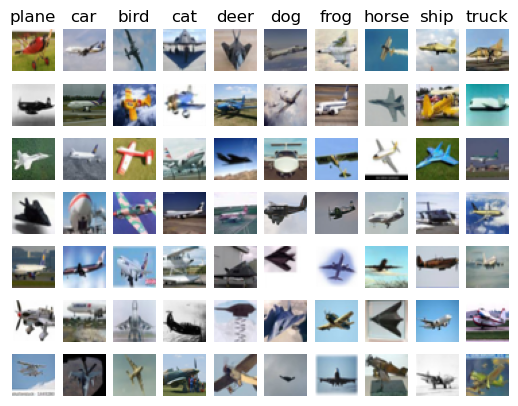

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)  # return idx of y_train that has value y
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
class KNearestNeighbor(object):

  def __init__(self):
    pass

  def train(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1, num_loops=0):
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)
    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sqrt(np.sum((X[i, :] - self.X_train[j, :]) **2))
    return dists

  def compute_distances_one_loop(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      dists[i, :] = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))
    return dists

  def compute_distances_no_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 
    dists = np.sqrt((-2 * np.dot(X, self.X_train.T)) + np.sum(X**2, axis=1, keepdims=True) + np.sum(self.X_train**2, axis=1))
    return dists

  def compute_l1_distances_two_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = np.sum((X[i, :] - self.X_train[j, :]))
    return dists

  def predict_labels(self, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        closest_y = []
        k_nearest_idxs = np.argsort(dists[i, :])[:k]
        closest_y = self.y_train[k_nearest_idxs]
        y_pred[i] = np.argmax(np.bincount(closest_y))
    return y_pred

In [13]:
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [15]:
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [16]:
dists = classifier.compute_distances_two_loops(X_test)
print( dists.shape)

(500, 5000)


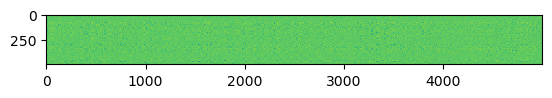

In [17]:
plt.imshow(dists, interpolation='none')
plt.show()

In [18]:
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print(num_correct, num_test, accuracy)

1 500 0.002


In [19]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print(num_correct, num_test, accuracy)

3 500 0.006


In [20]:
dists_one = classifier.compute_distances_one_loop(X_test)

difference = np.linalg.norm(dists - dists_one, ord='fro')
print(difference, )
if difference < 0.001:
  print ('Good! The distance matrices are the same')
else:
  print ('Uh-oh! The distance matrices are different')

0.0
Good! The distance matrices are the same


In [21]:

dists_two = classifier.compute_distances_no_loops(X_test)

difference = np.linalg.norm(dists - dists_two, ord='fro')
print (difference, )
if difference < 0.001:
  print ('Good! The distance matrices are the same')
else:
  print ('Uh-oh! The distance matrices are different')

369225.1275290006
Uh-oh! The distance matrices are different


In [22]:
def time_function(f, *args):
  import time
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print (two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print (one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print(no_loop_time)

42.30205726623535
18.66127586364746
4.399509429931641


In [23]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

import random

random_list = random.sample(list(zip(X_train, y_train)), len(list(zip(X_train, y_train))))
X_train, y_train = zip(*random_list)

X_train_folds = np.array_split(X_train, num_folds, axis=0) # list
y_train_folds = np.array_split(y_train, num_folds, axis=0) # list

k_to_accuracies = {}

for i in range(num_folds):
    X_train_batch = np.concatenate(X_train_folds[1:num_folds])   
    y_train_batch = np.concatenate(y_train_folds[0:num_folds])
    
    X_valid_batch = X_train_folds[0]   
    y_valid_batch = y_train_folds[0]
    
    if i < num_folds - 1:
        tmp = X_train_folds[0]
        X_train_folds[0] = X_train_folds[i+1]
        X_train_folds[i+1] = tmp
        tmp = y_train_folds[0]
        y_train_folds[0] = y_train_folds[i+1]
        y_train_folds[i+1] = tmp

    model = KNearestNeighbor()
    model.train(X_train_batch, y_train_batch)
    dists = model.compute_distances_two_loops(X_valid_batch)
    for k in k_choices:
        y_valid_pred = model.predict_labels(dists,k=k)
        num_correct = np.sum(y_valid_pred == y_valid_batch)
        accuracy = float(num_correct) / y_valid_batch.shape[0]
        if i == 0:
            k_to_accuracies[k] = [] 
        k_to_accuracies[k].append(accuracy)

for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print (k, accuracy)

1 0.003
1 0.003
1 0.002
1 0.002
1 0.0
3 0.0
3 0.005
3 0.004
3 0.0
3 0.004
5 0.001
5 0.002
5 0.002
5 0.0
5 0.005
8 0.001
8 0.001
8 0.004
8 0.003
8 0.005
10 0.001
10 0.001
10 0.004
10 0.003
10 0.004
12 0.001
12 0.002
12 0.005
12 0.004
12 0.003
15 0.0
15 0.002
15 0.005
15 0.006
15 0.001
20 0.001
20 0.001
20 0.002
20 0.005
20 0.0
50 0.001
50 0.002
50 0.001
50 0.004
50 0.003
100 0.002
100 0.001
100 0.001
100 0.002
100 0.004


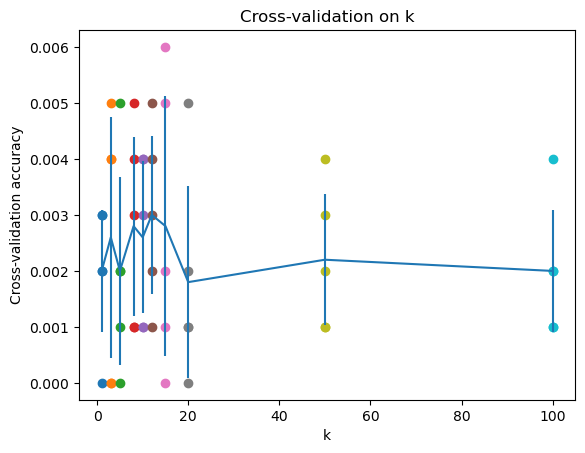

In [24]:
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [25]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

import random

random_list = random.sample(list(zip(X_train, y_train)), len(list(zip(X_train, y_train))))
X_train, y_train = zip(*random_list)

X_train_folds = np.array_split(X_train, num_folds, axis=0) # list
y_train_folds = np.array_split(y_train, num_folds, axis=0) # list

k_to_l1_accuracies = {}


for i in range(num_folds):
    X_train_batch = np.concatenate(X_train_folds[1:num_folds])   
    y_train_batch = np.concatenate(y_train_folds[0:num_folds])
    
    X_valid_batch = X_train_folds[0]   
    y_valid_batch = y_train_folds[0]
    
    if i < num_folds - 1:
        tmp = X_train_folds[0]
        X_train_folds[0] = X_train_folds[i+1]
        X_train_folds[i+1] = tmp
        tmp = y_train_folds[0]
        y_train_folds[0] = y_train_folds[i+1]
        y_train_folds[i+1] = tmp

    model = KNearestNeighbor()
    model.train(X_train_batch, y_train_batch)
    dists = model.compute_l1_distances_two_loops(X_valid_batch)
    for k in k_choices:
        y_valid_pred = model.predict_labels(dists,k=k)
        num_correct = np.sum(y_valid_pred == y_valid_batch)
        accuracy = float(num_correct) / y_valid_batch.shape[0]
        if i == 0:
            k_to_l1_accuracies[k] = [] 
        k_to_l1_accuracies[k].append(accuracy)

for k in sorted(k_to_l1_accuracies):
    for accuracy in k_to_l1_accuracies[k]:
        print (k, accuracy)

1 0.002
1 0.001
1 0.004
1 0.001
1 0.0
3 0.003
3 0.001
3 0.003
3 0.001
3 0.001
5 0.003
5 0.002
5 0.001
5 0.002
5 0.001
8 0.001
8 0.001
8 0.0
8 0.001
8 0.002
10 0.002
10 0.001
10 0.0
10 0.001
10 0.002
12 0.002
12 0.001
12 0.0
12 0.002
12 0.002
15 0.0
15 0.001
15 0.001
15 0.001
15 0.002
20 0.002
20 0.002
20 0.001
20 0.001
20 0.002
50 0.004
50 0.002
50 0.0
50 0.003
50 0.0
100 0.001
100 0.002
100 0.002
100 0.002
100 0.002


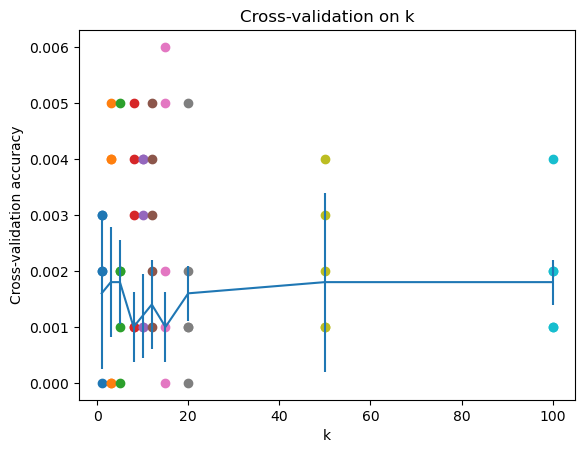

In [26]:
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_l1_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_l1_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

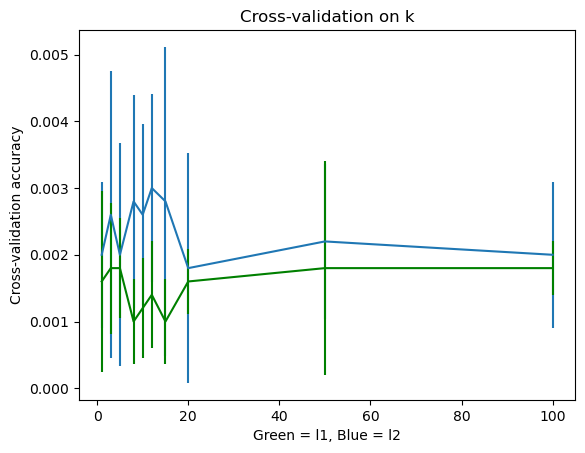

In [27]:
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_l1_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_l1_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std, color='green')
plt.title('Cross-validation on k')
plt.xlabel('Green = l1, Blue = l2')
plt.ylabel('Cross-validation accuracy')
plt.ylabel('Cross-validation accuracy')
plt.show()

# <h1>So, the accuracy of L2 distance is more than L1 distance. So, l2 distance is better.